In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import docx

In [3]:
#making a df by importing the values from the human reads txt

df = pd.read_csv('human_reads_int.txt', sep='\t', header=None)
header = ['chr', 'start_pos','end_pos','human_reads']
df.columns = header[:len(df.columns)]
df['chr'] = df['chr'].str.replace('chr','').astype(int) #CHR COLUMN
df = df.reset_index()

In [4]:
#making another df from the mutated reads file
mutated = pd.read_csv('altered_reads_int.txt', sep='\t', header=None)
header = ['chromosome', 'start_pos','end_pos','mutated_reads']
mutated.columns = header[:len(mutated.columns)]
mutated

,chromosome,start_pos,end_pos,mutated_reads
0,chr1,0,500000,76
1,chr1,500000,1000000,102
2,chr1,1000000,1500000,114
3,chr1,1500000,2000000,88
4,chr1,2000000,2500000,82
...,...,...,...,...
5755,chr22,48500000,49000000,82
5756,chr22,49000000,49500000,100
5757,chr22,49500000,50000000,114
5758,chr22,50000000,50500000,90


In [5]:
#adding the mutated reads column to the original  df
df['mutated_reads'] = mutated['mutated_reads'].values
df


,index,chr,start_pos,end_pos,human_reads,mutated_reads
0,0,1,0,500000,94,76
1,1,1,500000,1000000,112,102
2,2,1,1000000,1500000,126,114
3,3,1,1500000,2000000,102,88
4,4,1,2000000,2500000,78,82
...,...,...,...,...,...,...
5755,5755,22,48500000,49000000,104,82
5756,5756,22,49000000,49500000,100,100
5757,5757,22,49500000,50000000,108,114
5758,5758,22,50000000,50500000,116,90


In [6]:
#making RDR column
df['RDR'] = (df['mutated_reads'] / df['human_reads']) * (df['human_reads'].sum() / df['mutated_reads'].sum())
df

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
0,0,1,0,500000,94,76,0.901598
1,1,1,500000,1000000,112,102,1.015569
2,2,1,1000000,1500000,126,114,1.008931
3,3,1,1500000,2000000,102,88,0.962077
4,4,1,2000000,2500000,78,82,1.172321
...,...,...,...,...,...,...,...
5755,5755,22,48500000,49000000,104,82,0.879241
5756,5756,22,49000000,49500000,100,100,1.115135
5757,5757,22,49500000,50000000,108,114,1.177087
5758,5758,22,50000000,50500000,116,90,0.865191


In [7]:
len(df)

5760

ANALYSIS

--------------- CHR8, NORMAL COPY NUMBER -----------------------------------

In [8]:
chr20 = df[df['chr']==20] #what a normal copy number RDR looks like. 
len(chr20)


129

In [9]:
chr20_inf_RDR = chr20[chr20['RDR']== np.inf] #what a normal copy number RDR looks like. 
chr20_inf_RDR
len(chr20_inf_RDR)
chr20 = chr20.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
len(chr20)

129

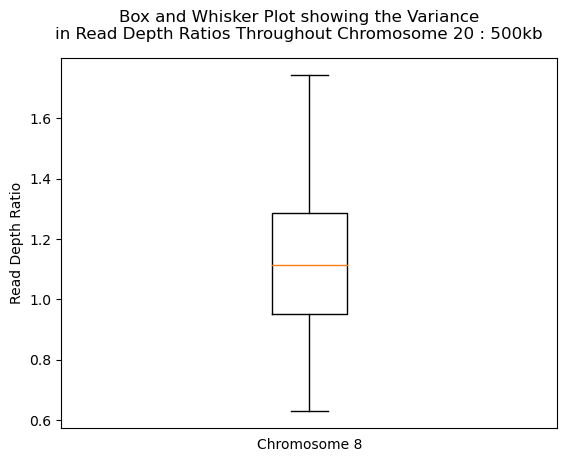

In [10]:
red_circle = dict(markerfacecolor='red', marker='o')

plt.boxplot(x=chr20.loc[:,'RDR'], flierprops=red_circle)

plt.suptitle("""Box and Whisker Plot showing the Variance 
in Read Depth Ratios Throughout Chromosome 20 : 500kb """)

plt.xlabel('Chromosome 8')
plt.xticks([])
plt.ylabel('Read Depth Ratio')

plt.savefig('Norm_chr20_int.png', dpi=200 )
plt.show()



In [11]:
chr20.loc[:,'RDR'].describe()

count    129.000000
mean       1.140677
std        0.240491
min        0.631208
25%        0.952511
50%        1.115135
75%        1.284829
max        1.744185
Name: RDR, dtype: float64

In [12]:
chr20.loc[:,'RDR'].mean() #mean RDR of a normal cell

1.1406773545518778

In [13]:
chr20.loc[:,'RDR'].quantile(0.95)

1.6019410449463374

In [14]:
# UQ_chr8 = chr8.loc[:,'RDR'].quantile(0.75)
# LQ_chr8 = chr8.loc[:,'RDR'].quantile(0.25)
# IQR_chr8 = UQ_chr8-LQ_chr8
# upper_outliers_chr8 = UQ_chr8 + (1.25*IQR_chr8)
# lower_outliers_chr8 = LQ_chr8 - (1.25*IQR_chr8)

In [15]:
# IQR_chr8

In [16]:
# chr8_without_outliers = chr8[[chr8['RDR'] < upper_outliers_chr8] and chr8['RDR'] > lower_outliers_chr8] 
# chr8_without_outliers.loc[:,'RDR'].mean()

---------------- CHR2 : HOMOZYGOUS DELETION ----------------------

In [17]:
chr2 = df[df['chr']==2] 
chr2.dropna(inplace=True) #what a homozgyous copy number RDR looks like. 


/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_62369/3740834707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chr2.dropna(inplace=True) #what a homozgyous copy number RDR looks like.


In [18]:
chr2_above_zero = chr2[chr2['RDR'] > 0]
chr2_above_zero
len(chr2_above_zero)


65

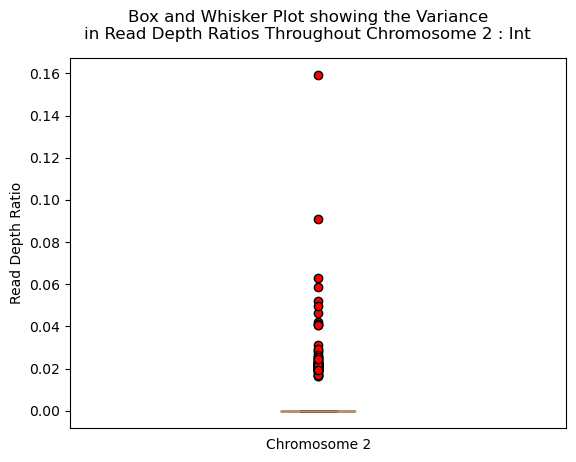

In [19]:
red_circle = dict(markerfacecolor='red', marker='o')

plt.boxplot(x=chr2.loc[:,'RDR'], flierprops=red_circle)

plt.suptitle("""Box and Whisker Plot showing the Variance 
in Read Depth Ratios Throughout Chromosome 2 : Int """)

plt.xlabel('Chromosome 2')
plt.xticks([])
plt.ylabel('Read Depth Ratio')

plt.savefig('HD_chr2_int.png', dpi=200 )

plt.show()



In [20]:
chr2.loc[:,'RDR'].quantile(q=0.95) #95% quantile

0.023231973410463284

In [21]:
plt.figure(figsize=(12,3))
#chr2 = sns.scatterplot(data=chr2, x='index', y='RDR', hue='chr', legend=False, palette='Set2', s=7) #look up how to move legend from graph

#chr2.set_ylim(0, 1.2)

plt.tight_layout()

plt.savefig('chr2_int_scatterplot', dpi=200 )

<Figure size 1200x300 with 0 Axes>

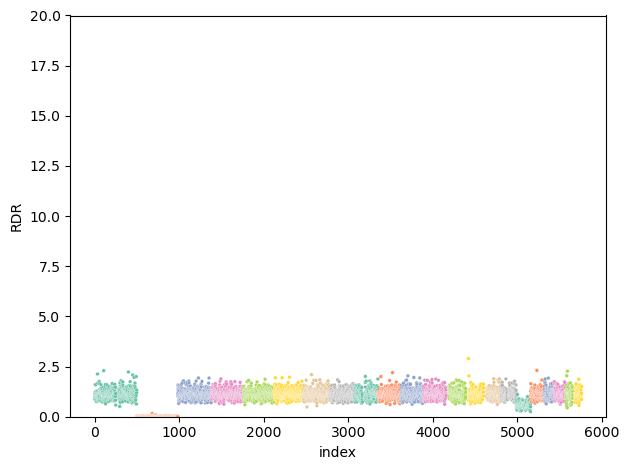

In [22]:
scatter = sns.scatterplot(data=df, x='index', y='RDR', hue='chr', legend=False, palette='Set2', s=7) #look up how to move legend from graph

scatter.set_ylim(0, 20)

plt.tight_layout()


In [23]:
chr2.loc[:,'RDR'].describe()

count    484.000000
mean       0.003862
std        0.012415
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.159305
Name: RDR, dtype: float64

In [24]:
UQ_chr2 = chr2.loc[:,'RDR'].quantile(0.75)
LQ_chr2 = chr2.loc[:,'RDR'].quantile(0.25)
IQR_chr2 = (UQ_chr2) -(LQ_chr2)
upper_outliers_chr2 = UQ_chr2 + (1.25* IQR_chr2)

In [25]:
IQR_chr2

0.0

In [26]:
chr2[chr2['RDR'] > upper_outliers_chr2]  #only 3 values with an RDR above 0.0333

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
502,502,2,2000000,2500000,102,2,0.021865
507,507,2,4500000,5000000,106,2,0.021040
508,508,2,5000000,5500000,116,2,0.019226
520,520,2,11000000,11500000,134,2,0.016644
544,544,2,23000000,23500000,94,2,0.023726
...,...,...,...,...,...,...,...
927,927,2,214500000,215000000,84,2,0.026551
950,950,2,226000000,226500000,88,2,0.025344
954,954,2,228000000,228500000,104,2,0.021445
965,965,2,233500000,234000000,116,2,0.019226


In [27]:
chr2_without_outliers = chr2[chr2['RDR'] < upper_outliers_chr2] 
chr2_without_outliers.loc[:,'RDR'].mean()

nan

---------------- CHR17 : HETEROZYGOUS DELETION ----------------------

In [28]:
chr17 = df[df['chr']==17]
len(chr17)

167

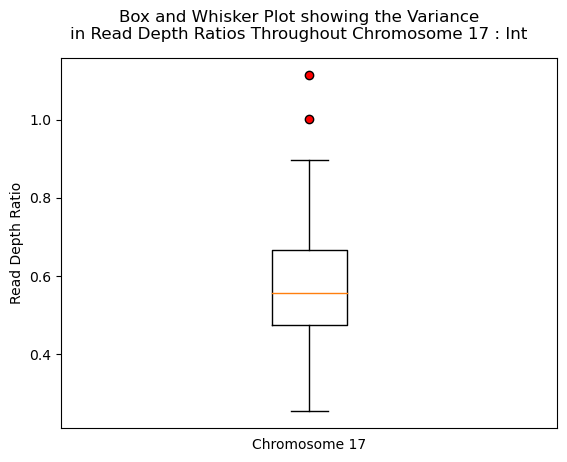

In [29]:
red_circle = dict(markerfacecolor='red', marker='o')

plt.boxplot(x=chr17.loc[:,'RDR'], flierprops=red_circle)

plt.suptitle("""Box and Whisker Plot showing the Variance 
in Read Depth Ratios Throughout Chromosome 17 : Int """)
             
plt.xlabel('Chromosome 17')
plt.xticks([])
plt.ylabel('Read Depth Ratio')

plt.savefig('Het_D_chr17_int.png', dpi=200 )
plt.show()



In [30]:
chr17.loc[:,'RDR'].describe()

count    167.000000
mean       0.569560
std        0.144052
min        0.254888
25%        0.473376
50%        0.557567
75%        0.666708
max        1.115135
Name: RDR, dtype: float64

In [31]:
chr17.loc[:,'RDR'].quantile(0.95)

0.8112353958464477

In [32]:
UQ_chr17 = chr17.loc[:,'RDR'].quantile(0.75)
LQ_chr17 = chr17.loc[:,'RDR'].quantile(0.25)
IQR_chr17 = (UQ_chr17) -(LQ_chr17)
upper_outliers_chr17 = UQ_chr17 + (1.25* IQR_chr17)

In [33]:
IQR_chr17

0.1933319284270334

In [34]:
chr17.loc[:,'RDR'].quantile(0.95)

0.8112353958464477

In [35]:
chr17[chr17['RDR'] > upper_outliers_chr17]  #only 3 values with an RDR above 0.0333

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
5000,5000,17,5500000,6000000,82,82,1.115135
5121,5121,17,66000000,66500000,98,88,1.001345


In [36]:
chr17_without_outliers = chr17[chr17['RDR'] < upper_outliers_chr17] 
chr17_without_outliers.loc[:,'RDR'].mean()

0.5636370643823243

MAPPING THESE ALL ON THE SAME GRAPH

Decided it's not a good comparison

In [38]:

# combined_dfs = pd.DataFrame({'2': chr2['RDR'],
#                              '8': chr8['RDR'],
#                              '17': chr17['RDR'],
#                              })
# combined_dfs

# sns.set_style('white')
# sns.boxplot(data=combined_dfs, palette='flare')
# plt.suptitle("""Box and Whisker Plot showing the Variance 
# in Read Depth Ratios Throughout Chromosomes: Int """)
# plt.xlabel('Chromosome')
# plt.ylabel('Read Depth Ratio')
# sns.despine()
# plt.savefig('combined_RDR_int', dpi=200 )
# plt.show()

GENOME WIDE RDR 

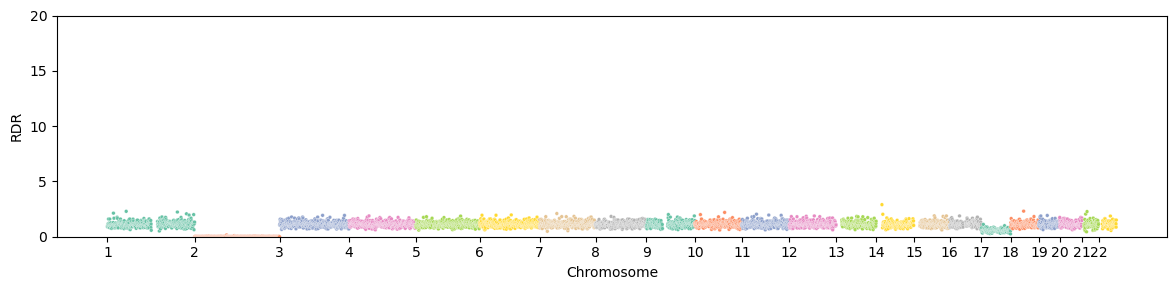

In [39]:
chromosome_pos = df.groupby('chr')['index'].first()

plt.figure(figsize=(12,3))
scatter = sns.scatterplot(data=df, x='index', y='RDR', hue='chr', legend=False, palette='Set2', s=7) #look up how to move legend from graph

plt.xticks(chromosome_pos.values, chromosome_pos.index)

scatter.set_ylim(0, 20)

plt.xlabel('Chromosome')

plt.tight_layout()

plt.savefig('Genome_wide_RDR_int_updated', dpi=200 )